# Confidence interval of a proportion

## Introduction

The confidence interval of a proportion is a fundamental concept in biostatistics that allows us to estimate the range within which a population parameter lies, based on our sample data.

## Definitions

### What is a Confidence Interval?

A confidence interval is a range of values, derived from a data set, that is likely to contain the value of an unknown population parameter. It provides an estimated range of values which is likely to include an unknown population parameter, the estimated range being calculated from a given set of sample data.

### What is a proportion?

In statistics, a proportion refers to the fraction of the total that carries a certain characteristic. For example, if we have a sample of 100 individuals and 45 of them are female, the proportion of females in the sample is $45/100 = 0.45$.

### Confidence interval of a proportion

When we talk about the confidence interval of a proportion, we're trying to find a range that likely contains the true proportion of the population that carries a certain characteristic. This is based on the proportion we've found in our sample.

In this chapter, we will learn how to calculate the confidence interval of a proportion using Python with the NumPy and SciPy packages. We will also discuss the interpretation of confidence intervals, the impact of sample size on the confidence interval, and common misconceptions about confidence intervals.

## Binomial distribution

The Binomial Distribution is a crucial concept in statistics and probability theory that describes the number of successes in a sequence of independent experiments.

A **binomial distribution** can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has **two possible outcomes** (the prefix 'bi' means two, or twice).

### Single coin flip

When we flip a coin once, there are two possible outcomes: heads (H) or tails (T). If the coin is fair, the probability of getting heads $P(H)$ is 0.5, and the probability of getting tails $P(T)$ is also 0.5. This is because a fair coin is equally likely to land on either side.

This scenario can be modeled as a binomial distribution with parameters n=1 (number of trials) and p=0.5 (probability of success on each trial). In this case, a "success" could be defined as getting heads. Here's how we can simulate a single coin flip in Python:

In [67]:
import numpy as np

n = 1  # number of coin flips
p = 0.5  # probability of getting heads

# Simulate a single coin flip
flip_result = np.random.binomial(n, p)

# Check the result
if flip_result == 1:
    print("Heads")
else:
    print("Tails")

Heads


In this script, `np.random.binomial(n, p)` generates a random number that follows a binomial distribution. It returns the number of successes (heads, in this case), which can be either 0 or 1 for a single coin flip. Although we can calculate the probabilities exactly for a single coin flip, real-world phenomena often involve more complex situations with multiple trials, which is where the binomial distribution becomes truly useful.

### Multiple coin flips

Let's now simulate 10,000 experiments of flipping a coin 10 times each, calculates the mean number of heads across all experiments, and visualize the results.

In [68]:
# Parameters of the binomial distribution
n = 10  # number of coin flips per experiment
p = 0.5 # probability of getting heads

np.random.seed(111) # for reproducibility

# Number of experiments
num_experiments = 10000

# Simulate the experiments
experiments = np.random.binomial(n, p, num_experiments)

# Calculate the mean number of heads
mean_heads = np.mean(experiments)

print(f"Mean number of heads out of 10 flips in {num_experiments} experiments: {mean_heads}")

Mean number of heads out of 10 flips in 10000 experiments: 5.0224


The `experiments` array contains 10,000 values ranging from 0 to 10, with the mean number showed above. Let's plot a histogram to visualize the distribution of the number of heads in these experiments.

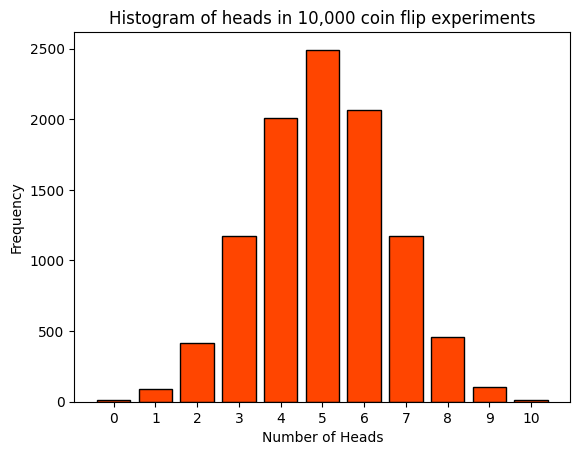

In [69]:
import matplotlib.pyplot as plt

plt.hist(
    experiments,
    bins=range(n+2),
    align='left',
    rwidth=0.8,
    color='orangered',
    edgecolor='black',
)
plt.xlabel('Number of Heads')
plt.xticks(np.arange(0, 11, 1))
plt.ylabel('Frequency')
plt.title('Histogram of heads in 10,000 coin flip experiments');

A histogram is a graphical representation that organizes a group of data points into a specified range. In this case, the data points are the number of heads obtained in each of the 10,000 experiments of flipping a coin 10 times. The x-axis represents the number of heads obtained in each experiment, which can range from 0 to 10. The y-axis represents the frequency, i.e., the number of experiments that resulted in a certain number of heads. Each bar in the histogram corresponds to the number of heads (from 0 to 10). The height of each bar represents the number of experiments that resulted in that many heads.

For a fair coin, we would expect the most common outcome to be **around 5 heads**, so the tallest bar should be around the middle of the histogram. This is because the **binomial distribution is symmetric** for a fair coin ($p=0.5$).

In summary, the histogram provides a visual representation of the distribution of outcomes over many repeated experiments, and it should reflect the properties of the binomial distribution given a large enough number of experiments. It's a great way to intuitively understand the concept of a binomial distribution. Happy learning!

### Probability and frequency

**Probability** is a statistical measure that shows the likelihood of an event to happen. It is quantified as a number between 0 and 1, where 0 indicates that the event will not happen and 1 indicates that the event will definitely happen. In our coin flipping experiment, the probability of getting heads (or tails) in a single flip of a fair coin is 0.5, meaning there's a 50% chance we'll get heads (or tails).

**Frequency**, on the other hand, is a measure of the number of times an event occurs. For example, if we flip a coin 10 times and get heads 7 times, the frequency of heads is 7. When we repeat an experiment many times, like flipping a coin 10,000 times, we can calculate the frequency of each outcome (number of heads). This gives us an empirical or observed probability, which should be close to the theoretical probability if we repeat the experiment enough times.

In a large number of trials, the relative frequency (the frequency of an event divided by the total number of trials) can approximate the probability of an event. However, probability is a theoretical concept based on the nature of the experiment, while frequency is an empirical concept based on actual data or experiments.

Here for example we can answer the question: "If we flip a coin fairly 10 times, what is the chance of observing 7 _or more_ heads?"

In [70]:
freq_7 = np.sum(experiments >= 7) / 10000
print(freq_7)

0.1741


## Computational methods for binomial distribution

`scipy.stats.binom` is a function in the [SciPy library](https://scipy.org/) in Python that provides a suite of methods for the binomial distribution. Here's a brief introduction to some of the main methods provided by it:

- `pmf(k, n, p)` is the Probability Mass Function (PMF). It gives the probability of getting exactly k successes (heads) in n trials (flips), when the probability of success on any given trial is p.
- `cdf(k, n, p)` is the Cumulative Distribution Function (CDF). It gives the probability of getting k or fewer successes in n trials.
- `sf(k)`, also called the Survival Function (SF), is defined as $1 - \text{cdf}(k)$, and it gives the probability of getting more than k successes.
- `mean(n, p)`, `var(n, p)`, `std(n, p)` return the mean, variance, and standard deviation of the binomial distribution respectively.
- `rvs(n, p, size)` generates random variates in a given shape.

Note that the `binom` function in `scipy.stats` takes only two parameters: $n$ (number of trials) and $p$ (probability of success on each trial). The `scipy.stats.binom(n, p).rvs(num_trials)` and `np.random.binomial(n, p, num_trials)` methods are equivalent. Both generate `num_trials` random variates from a binomial distribution with $n$ trials and $p$ probability of success on each trial.

In [71]:
from scipy.stats import binom

# Number of trials and probability of success
n = 10
p = 0.5

model = binom(n, p)

# calculates the mean, variance and standard deviation of a binomial
# distribution with n trials and p probability of success on each trial
print("Mean and variance of the distribution: ", model.stats(moments='mv'))
print(f"Mean and standard deviation: ({model.mean()}, {model.std():.3f})")

Mean and variance of the distribution:  (5.0, 2.5)
Mean and standard deviation: (5.0, 1.581)


The `ppf` function stands for Percent Point Function (PPF), which is also known as the inverse of the Cumulative Distribution Function (CDF). The `ppf` takes a probability $q$ and returns the corresponding x-value (or point) in the distribution such that the probability of observing a value less than or equal to that point is the given probability.

When we plot from `ppf(q=0.001)` to `ppf(q=0.999)`, we're essentially plotting the range of x-values (or points) that contain the *central 99.8%* of the distribution. This range excludes the extreme 0.1% on either end of the distribution.

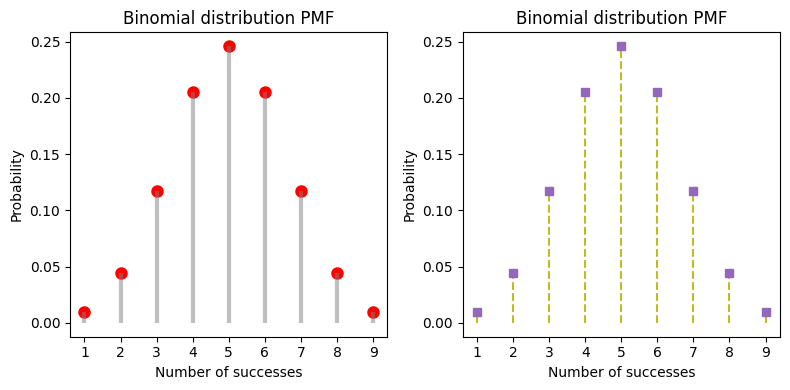

In [72]:
# Calculate the percent point function values
#x_start = binom.ppf(0.001, n, p)
x_start = model.ppf(q=0.001) # the distribution/model was previously set up
# x_end = binom.ppf(0.999, n, p)
x_end = model.ppf(q=.999)

# Generate x values
x = np.arange(x_start, x_end+1)

# Calculate the probability mass function values
#pmf_values = binom.pmf(x, n, p)
pmf_values = model.pmf(x) # type: ignore

# Plot the PMF using plot and stem methods
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axes[0].plot(x, pmf_values, 'ro', ms=8)

# lollipop style
axes[0].vlines(x, 0, pmf_values, colors='grey', lw=3, alpha=.5)

axes[1].stem(x, pmf_values, markerfmt="C4s", linefmt="C8--", basefmt=" ")

for ax in axes:
    ax.set_title('Binomial distribution PMF')
    ax.set_xlabel('Number of successes')
    ax.set_ylabel('Probability')
    ax.set_xticks(range(1,10))

plt.tight_layout();

### Simulating a clinical trial scenario

Let's say we're conducting a clinical trial for a new drug. We have 30 patients in the trial, and we're interested in the number of patients who show improvement with the medication, or said differently, what is the chance that 10 _or more_ of the next 30 patients will get better. Based on previous studies, we estimate that the probability of a patient showing improvement is 0.05 (5%). Here's how we can simulate this scenario 10,000 times.

In [73]:
# Parameters of the binomial distribution
n = 30  # number of patients
p = 0.05  # probability of a patient showing improvement

# Number of trials
num_trials = 10000

# Simulate the trials
trials = binom(n, p).rvs(num_trials, random_state=111) # for reproducibility

# Calculate the mean number of improvements
mean_improvements = np.mean(trials)

print(f"Mean number of improvements in {num_trials} trials: {mean_improvements}")

Mean number of improvements in 10000 trials: 1.5165


In [74]:
trials[:15]

array([2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 5, 1, 0, 2, 2], dtype=int64)

The script returns the array `trials` of length 10,000 where each element is the number of improvements in a trial, and then calculates the mean number of improvements across all trials.

To calculate the probability of getting exactly 10 improvements out of 30 in a single trial, we can use the Probability Mass Function (PMF) of the binomial distribution. In Python, we can use the `binom.pmf` function from the `scipy.stats` module.

Overall this simulation can give us a sense of the variability we might expect in the number of improvements when conducting the clinical trial multiple times. It's a powerful tool for understanding the potential outcomes and risks associated with the trial.

In [75]:
# Calculate the probability of getting exactly 10 improvements
prob = binom.pmf(10, n, p)

print(f"The probability of getting exactly 10 improvements in a single trial is {prob:.3f}")

The probability of getting exactly 10 improvements in a single trial is 0.000


Or we can simply count the number of trials that resulted in 10 improvements:

In [76]:
# Calculate the frequency of getting exactly 10 improvements
freq = (trials == 10).sum()

print(f"The frequency of getting exactly 10 improvements in {num_trials} trials is {freq}")

The frequency of getting exactly 10 improvements in 10000 trials is 0


Let's finally plot a histogram to visualize the distribution of improvements.

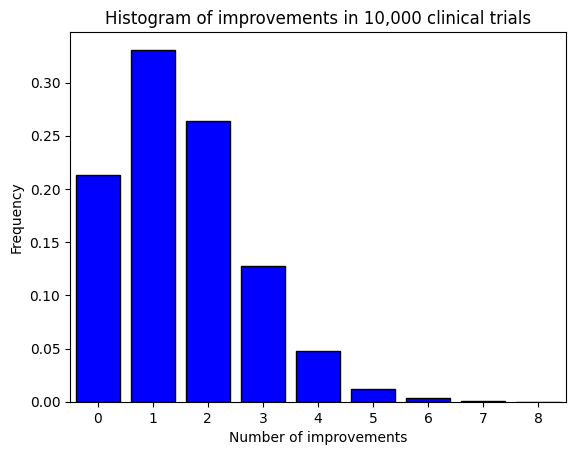

In [77]:
# Plot the histogram
plt.hist(
    trials,
    bins=range(n+2),
    align='left',
    rwidth=0.8,
    color='blue',
    edgecolor='black',
    density=True,)
plt.title('Histogram of improvements in 10,000 clinical trials')
plt.xlabel('Number of improvements')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(-.5, 8.5)
plt.ylabel('Frequency');

### The voters example

Let's calculate the answer for the question of the book: "If 40% of voters are Democrats, what is the chance that a random sample of 600 voters will be at least 45% Democrat?"

In [78]:
# Parameters of the binomial distribution
n = 600  # number of voters in the sample
p = 0.4  # probability of a voter being a Democrat

# Number of successes we're interested in
k = int(0.45 * n) - 1  # subtract 1 because we want at least 45%, not up to 45%

# Calculate the probability of getting at least 45% Democrats
prob = binom.sf(k, n, p)

print(f"The probability of getting at least 45% Democrats in the sample is {prob:.3f}")

The probability of getting at least 45% Democrats in the sample is 0.007


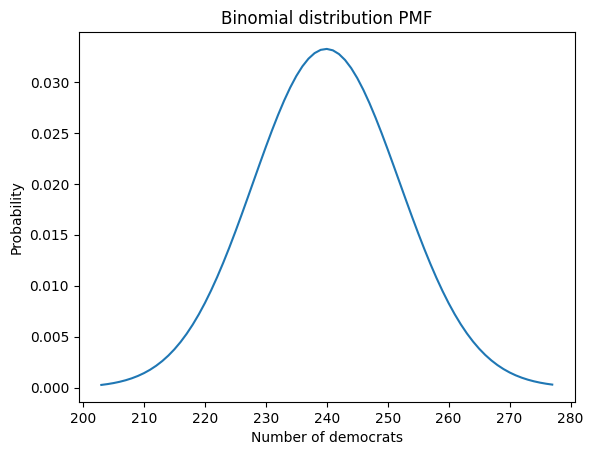

In [79]:
x = np.arange(   # linspace not appropriate for non-continuous distributions
    binom.ppf(.001, n, p),
    binom.ppf(.999, n, p)+1, # include the point at the 99.9th percentile
    step=1)
plt.plot(x, binom(n,p).pmf(x)) # type: ignore
plt.title('Binomial distribution PMF')
plt.xlabel('Number of democrats')
plt.ylabel('Probability');
#plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=.5);

The previous script gives a theoretical calculation based on the binomial distribution, not an empirical result based on random sampling. Let's try the random sampling approach using the `rvs` function.

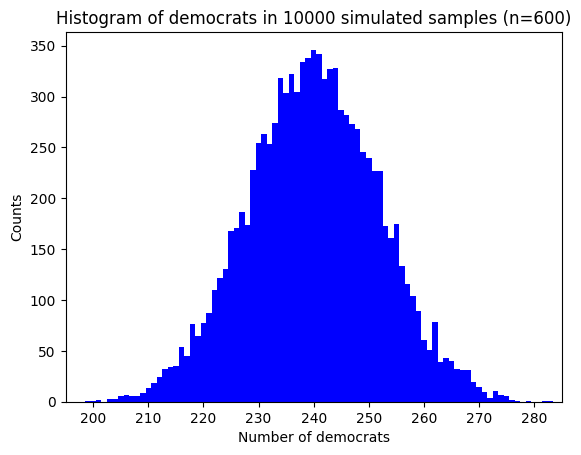

In [80]:
# Parameters of the binomial distribution
n = 600  # number of voters in the sample
p = 0.4  # probability of a voter being a Democrat

# Number of simulations
num_simulations = 10000

# Number of successes we're interested in
k = int(0.45 * n)  # at least 45% Democrats

# Simulate the samples
samples = binom(n=n, p=p).rvs(size=num_simulations, random_state=111)

# plt.hist(samples, bins=range(n+2), align='left', color='blue', density=True)
# density=True normalizes the histogram
plt.hist(samples, bins=range(n+2), align='left', color='blue')
plt.title(f"Histogram of democrats in {num_simulations} simulated samples (n={n})")
plt.xlabel('Number of democrats')
plt.xlim(195, 285)
plt.ylabel('Counts');

This histogram gives we a visual representation of the distribution of Democrats in the simulated samples. Each bar represents the number of samples that resulted in a certain number of Democrats.

Unless we set the 'random_state' parameter to a fixed value, every run of the script generates a new set of random samples from the binomial distribution, which can result in a slightly different distribution each time. This is due to the inherent randomness in the sampling process. However, despite these differences, all the distributions generated will have the same underlying characteristics defined by the binomial distribution with parameters $n$ (number of trials) and $p$ (probability of success). In other words, they are all samples from the same population distribution.

This is a fundamental concept in statistics and is the basis for techniques such as hypothesis testing, confidence intervals, and other calculations such as the empirical probability of obtaining at least a certain proportion like in the example below.

In [81]:
# Calculate the frequency of getting at least k Democrats
freq = np.sum(samples >= k)

# Calculate the empirical probability
empirical_prob = freq / num_simulations

print(f"The empirical probability of getting at least 45% Democrats in the sample is \
{empirical_prob}")

The empirical probability of getting at least 45% Democrats in the sample is 0.0059


## Confidence interval

### Free throw success rate example

We will explore the concept of confidence intervals in the context of basket free throws by taking the example on pages 32-33 of the book.

Let's consider a basketball player who makes 17 out of 20 free throws. We can consider each free throw as a Bernoulli trial where there are only two possible outcomes - **success** (the player makes the shot) or **failure** (the player misses the shot). This gives us a sample success rate of 85%, however, this is just an estimate based on a limited number of shots. If the player were to take many more shots, their overall success rate might be slightly higher or lower.

In [82]:
for a in range(5):
    print(f"Attempt {a}: {np.random.binomial(20, .85)} successes")

Attempt 0: 15 successes
Attempt 1: 17 successes
Attempt 2: 17 successes
Attempt 3: 15 successes
Attempt 4: 20 successes


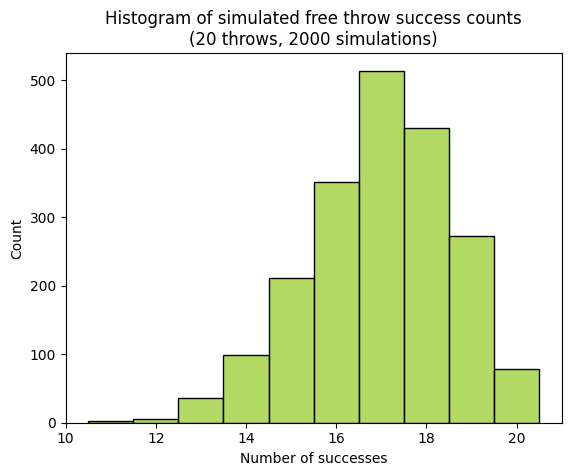

In [83]:
import seaborn as sns # let's use another visualization package

# Parameters of the binomial distribution
n = 20  # denominator: number of free throw attempts
s = 17  # numerator: number of successeful throws
p = s/n # success rate

# Number of simulations
np.random.seed(111) # for reproducibility
num_simulations = 2000

# Simulate the success rates
success_throws = np.random.binomial(n, p, num_simulations)

# Plot the histogram
sns.histplot(
    success_throws,
    stat='count',
    discrete=True, # default to `binwidth=1` and draw bars centered on the datapoint
    color='yellowgreen',
    edgecolor='black',)
plt.title(f"Histogram of simulated free throw success counts\n(20 throws, {num_simulations} simulations)")
plt.xlabel('Number of successes')
plt.ylabel('Count');

To account for this uncertainty, we use a **confidence interval**. A confidence interval provides a range of values within which we expect the player's *true* success rate (across all potential shots) to lie, with a certain level of confidence.

For instance, a 95% confidence interval might suggest that the player's true success rate is likely between 50% and 70%. This range gives us a better sense of the player's potential performance in the future.

The width of the confidence interval reflects our uncertainty. A wider interval indicates more uncertainty about the true success rate.

To calculate this confidence interval, we can use various methods, including traditional approaches based on **statistical assumptions** or techniques like **bootstrapping**, which involves resampling from the observed data.

### Constructing confidence intervals via classical methods

We can for example compute the confidence interval using the modified **Wald method** by hand, as described in the book "Intuitive Biostatistics":

1. $p'=\frac{s + 2}{n + 4}$ where $s$ is the number of successes, and $n$ the number of trials
2. The margin of error is $W = 2\sqrt{\frac{p' (1 - p')}{n + 4}}$
3. Finally, the 95% confidence interval spans from $(p' - W)$ to $(p' + W)$

In [84]:
p_prime = (s+2)/(n+4) # n=20
W = 2*(p_prime*(1-p_prime)/(n+4))**.5
ci_inf = p_prime - W
ci_sup = p_prime + W

print(f"The 95% confidence interval based on the modified Wald method extends \
      \nfrom {100*ci_inf:.2f}% to {100*ci_sup:.2f}% of success")

The 95% confidence interval based on the modified Wald method extends       
from 62.59% to 95.75% of success


Programatically, we can also use:
- `scipy.stats.norm.interval` to compute the confidence interval _assuming a normal distribution_
- [`statsmodels.stats.proportion`](https://www.statsmodels.org/dev/stats.html#proportion) to compute the confidence interval for proportions using different methods, including:
  - the numerical inversion of the binomial test from SciPy ('binom_test')
  - Clopper-Pearson interval based on Beta distribution ('beta')
- `scipy.stats.binom` to compute the confidence interval with equal areas around the median

Finally, we can also find [a calculator for confidence interval of a proportion](https://www.graphpad.com/quickcalcs/confInterval1/) from GraphPad.

In [85]:
from scipy.stats import norm
import statsmodels.stats.proportion as smp

# Calculate the mean and standard deviation of the success rates from the previous simulation
# Later we'll see how to leverage mean and std directly from the theoritical model
mean = np.mean(success_throws)
std_dev = np.std(success_throws)

# Calculate the 95% confidence interval using scipy.stats.norm.interval
ci_lower, ci_upper = norm.interval(0.95, loc=mean, scale=std_dev)
print(f"95% CI of successful throws (assuming a normal distribution): \
({ci_lower:.0f}, {ci_upper:.0f}) out of 20")

# Calculate the 95% confidence interval for proportions using statsmodels.stats.proportion
ci_lower, ci_upper = smp.proportion_confint(count=s, nobs=n, alpha=0.05, method='normal')
print(f"95% CI for the success rate (using default 'normal'): \
({100*ci_lower:.2f}%, {100*ci_upper:.2f}%)")

ci_lower, ci_upper = smp.proportion_confint(count=s, nobs=n, alpha=0.05, method='binom_test')
print(f"95% CI for the success rate (using 'binom_test'): \
({100*ci_lower:.2f}%, {100*ci_upper:.2f}%)")

# An alternative method is Clopper-Pearson (used in GraphPad), called 'beta'
ci_lower, ci_upper = smp.proportion_confint(count=s, nobs=n, alpha=0.05, method='beta')
print(f"95% CI for the success rate (using Clopper-Pearson 'beta'): \
({100*ci_lower:.2f}%, {100*ci_upper:.2f}%)")

# Calculate the 95% CI around the median using scipy.stats.binom.interval
ci_lower, ci_upper = binom.interval(confidence=.95, n=n, p=p)
print(f"95% CI with equal areas around the median: \
({ci_lower:.0f}, {ci_upper:.0f}) out of 20")

95% CI of successful throws (assuming a normal distribution): (14, 20) out of 20
95% CI for the success rate (using default 'normal'): (69.35%, 100.00%)
95% CI for the success rate (using 'binom_test'): (62.78%, 95.78%)
95% CI for the success rate (using Clopper-Pearson 'beta'): (62.11%, 96.79%)
95% CI with equal areas around the median: (14, 20) out of 20


### Bootstrapping and the central limit theorem

The actual calculation of the confidence interval can depend on the assumptions we make about the underlying distribution of the data. If the sample size is large enough, the sampling distribution of the sample proportion is approximately normally distributed. In this case, we can use methods for constructing confidence intervals based on the normal distribution or resampling/bootstraping.

The **central limit theorem (CLT)** states that the distribution of the sum (or average) of a large number of independent, identically distributed variables approaches a normal distribution, regardless of the shape of the original distribution.

In the context of our experiment, if we're conducting a large number of trials (like 10,000), the distribution of the sample proportions (the number of successes in each trial divided by the number of attempts) will tend to follow a normal distribution. 

In [95]:
# Set random seed for reproducibility
np.random.seed(111)

# Parameters of the binomial distribution
n = 20  # denominator: number of free throw attempts
s = 17  # numerator: number of successeful throws
p = s/n # success rate

# Generate original sample
original_sample = np.random.binomial(1, p, n)  # 1 for success, 0 for failure

B = 10000  # Number of replicates

# !Make sure to choose exactly N elements randomly **with replacement**
# from the original N-data point set, e.g., size=20 for this example
bs_replicates = np.array([
    np.mean(
        np.random.choice(
            original_sample,
            size=len(original_sample),
            replace=True
        )) for _ in range(B)
    ])

print(bs_replicates[:10])  # print the 10 first replicates

[0.85 1.   0.8  0.95 0.9  0.9  0.9  0.85 0.9  0.95]


Therefore, when we calculate the **2.5th and 97.5th percentiles** of this distribution (which gives us a 95% confidence interval), it should be **close to the theoretical binomial confidence interval**, especially when the number of trials is large.

In [87]:
# Calculate the 95% confidence interval using np.percentile
bs_ci = np.round(np.percentile(bs_replicates, [2.5, 97.5]), 3)

# Print the results
print(f"Bootstrap 95% CI estimate = {bs_ci}")

Bootstrap 95% CI estimate = [0.75 1.  ]


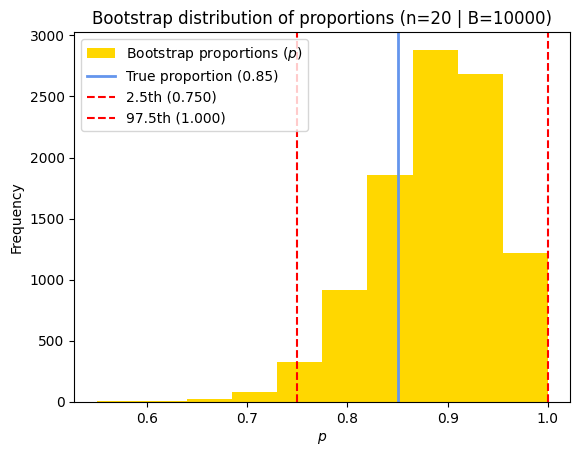

In [88]:
# Plot the histogram of the bootstrap distribution of correlation coefficients
plt.hist(
    bs_replicates,
    density=False,
    bins=10,
    color='gold',
    label=r'Bootstrap proportions ($p$)')

# Annotate the observed mean difference
plt.axvline(
    x=p,  # type: ignore
    color='cornflowerblue',
    linestyle='-', lw=2,
    label=fr'True proportion ({p:.2f})')

# Add lines for the confidence interval
plt.axvline(
    x=bs_ci[0],
    color='red',
    linestyle='--',
    label=f'2.5th ({bs_ci[0]:.3f})')
plt.axvline(
    x=bs_ci[1],
    color='red',
    linestyle='--',
    label=f'97.5th ({bs_ci[1]:.3f})')

# Add labels and title
plt.xlabel(r'$p$')
plt.ylabel('Frequency')
plt.title(f"Bootstrap distribution of proportions (n={n} | B={B})")
plt.legend();

While the CLT provides an approximation for calculating confidence intervals, its accuracy depends on factors like the number of trials and the true success probability. This approximation tends to be more reliable with larger sample sizes and when the probability isn't too close to the extremes of 0 or 1.

Moreover, the purpose of bootstrapping is to estimate the sampling distribution of a statistic based on the original observed data. It relies on the idea that your original sample is a good representation of the population.  When we resample from a randomly generated sample, we're essentially resampling from noise. This introduces artificial variability that doesn't reflect the true population, leading to inaccurate and misleading confidence intervals. So keep bootstrapping for real data.

### What does 95% confidence really mean?

Remember, the confidence interval gives a range of plausible values for the population proportion based on the sample data. It **does not guarantee that the population proportion is within this range**, but it gives a range where the population proportion is likely to fall, with a certain level of confidence (often 95%).

We illustrate that using the example of pages 35-36. The experiment involves a bowl that contains 100 balls in total. Out of these, 25 balls are red and the remaining 75 balls are black. The balls are well mixed to ensure randomness. The process is as follows:

1. A ball is chosen randomly from the bowl.
2. The color of the ball is recorded.
3. The ball is then placed back into the bowl.
4. The balls are mixed again.
5. Steps 1-4 are repeated 15 times.

Each time a ball is chosen, it represents a Bernoulli trial since there are only two possible outcomes - the ball is either red or black. The proportion of red balls chosen in these 15 trials is recorded.

This process is then simulated 20 times, each time recording the fraction of red balls chosen. For each simulation, a 95% confidence interval for the proportion of red balls is computed. The aim is to observe that **approximately 1 out of 20 of these 95% confidence intervals will not include the true population proportion** of red balls (which is 0.25 or 25% in this case).

In [89]:
# Parameters of the binomial distribution
n = 15     # number of trials
s = .25*15 # red balls
p = s/n    # success rate

# Number of simulations
num_simulations = 10000

# Simulate the probability rates
model = binom(n=n, p=p)
bowl = model.rvs(size=10000, random_state=111)

# Calculate the 95% confidence interval based on the CLT
ci_lower, ci_upper = np.percentile(bowl, [2.5, 97.5])
print(f"The 95% confidence interval (numpy percentile) is \
({ci_lower:.3f}, {ci_upper:.3f}) out of 15")

# Calculate the 95% confidence interval using scipy.stats.norm.interval
ci_lower, ci_upper = norm.interval(0.95, loc=model.mean(), scale=model.std())
print(f"The 95% confidence interval (scipy norm.interval) is \
({ci_lower:.2f}, {ci_upper:.2f}) out of 15")

The 95% confidence interval (numpy percentile) is (1.000, 7.000) out of 15
The 95% confidence interval (scipy norm.interval) is (0.46, 7.04) out of 15


The `statsmodels.stats.proportion.proportion_confint` function is used to calculate the confidence interval for a proportion in a way that properly accounts for the binomial distribution, which is **discrete**. The `count` parameter of this function represents the number of successes (in this case, the number of red balls drawn), and it must be an integer because we can't have a fraction of a success in a binomial experiment. It's either a success or not, hence, it's a discrete value.

So, in our case, if we're drawing 15 balls and we know that 25% of them are red, we can't enter 0.25 * 15 for the count parameter because this would be a fractional number. Instead, we should enter the actual number of red balls drawn in the sample. For example, if we drew 4 red balls out of 15, we would enter 4 for the count parameter.

In [90]:
# Number of successes and trials
count = 4  # number of red balls drawn
nobs = 15  # total number of balls drawn

# Calculate the 95% confidence interval for the proportion
ci_lower, ci_upper = smp.proportion_confint(count, nobs, alpha=0.05, method='binom_test')

print(f"The 95% confidence interval for the proportion of red balls is \
({100*ci_lower:.2f}%, {100*ci_upper:.2f}%)")

The 95% confidence interval for the proportion of red balls is (9.67%, 53.43%)


Let's simulate the trials, and calculate the confidence intervals for 100 random experiments.

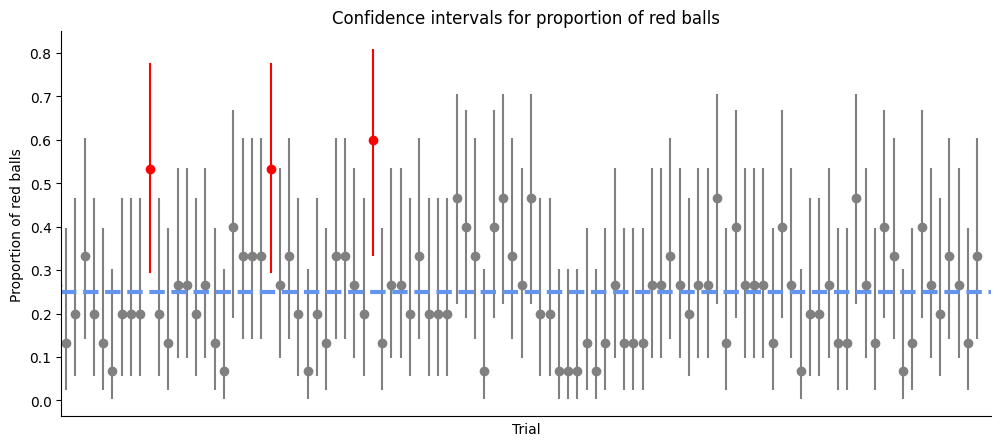

In [93]:
# Parameters of the binomial distribution
n = 15    # number of balls drawn per trial
p = 0.25  # probability of drawing a red ball

# Number of trials
num_trials = 100

# Simulate the trials
red_balls = binom(n, p).rvs(num_trials, random_state=111)

# Calculate the confidence intervals
confidence_intervals = [
    smp.proportion_confint(count, n, alpha=0.05, method='binom_test') for count in red_balls]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12,5))

# Loop over the data and create error bars with different colors based on the condition
for i, (count, (ci_lower, ci_upper)) in enumerate(zip(red_balls, confidence_intervals)):
    color = 'red' if ci_lower > 0.25 or ci_upper < 0.25 else 'grey'
    ax.errorbar(i, count/n, [[count/n - ci_lower], [ci_upper - count/n]], color=color, fmt='o')

plt.axhline(p, ls='--', lw=3, color='cornflowerblue')
plt.title('Confidence intervals for proportion of red balls')
plt.xlabel('Trial')
plt.xticks([])
plt.xlim(.5, 100.5)
plt.ylabel('Proportion of red balls')
sns.despine();

This experiment helps illustrate the concept of confidence intervals and their interpretation. It shows that a 95% confidence interval does not guarantee that the population parameter (in this case, the proportion of red balls) lies within the interval. Rather, it means that if we were to repeat the experiment many times and calculate a confidence interval each time, we would expect about 95% of these intervals to contain the population parameter. Interestingly, [Cumming and Maillardet (2006)](https://psycnet.apa.org/doi/10.1037/1082-989X.11.3.217) have shown that the first 95% CI will include the sample means of 83.4% of repeat experiments, due to experimental bias and error.

## Conclusion

Throughout this chapter, we've explored various statistical concepts and how to implement them programmatically using Python. We've used libraries such as NumPy, SciPy, statsmodels, Matplotlib ans Seaborn to simulate experiments, calculate statistics, and visualize data.

We started with a discussion on binomial distribution and confidence intervals in the context of polling voters and basketball free throws. We then simulated an experiment involving drawing balls from a bowl and calculated confidence intervals for the proportion of red balls drawn.

We learned how to use the `binom` function from SciPy to simulate binomial experiments, and the `proportion_confint` function from `statsmodels.stats.proportion` to calculate confidence intervals for proportions. We also discussed how to use numpy for array operations and random number generation. In addition, we explored the Central Limit Theorem and its implications for the approximation of the binomial distribution with the normal distribution.

Overall, this chapter provided a practical, hands-on introduction to some key statistical concepts and how to work with them programmatically in Python. It demonstrated the power of Python and its libraries for statistical analysis and data visualization, and it highlighted the importance of understanding these concepts for interpreting statistical results and making informed decisions based on data.

## Cheat sheet

This cheat sheet provides a quick reference for essential code snippets used in this chapter.

### Binomial distribution

```python
from scipy.stats import binom

# Parameters of the binomial distribution
n = 10   # number of trials
p = 0.5  # probability of succes

# Prepare the distribution
binom_distribution = binom(n=n, p=p)

# Calculate mean, variance (and more), and SD from the distribution
binom_distribution.stats(moments='mv')
binom_distribution.mean()
binom_distribution.std()
```

### PMF Lollipop plot

```python
import numpy as np
import matplotlib.pyplot as plt

plt.stem(
    # central 99.8% of the distribution
    x:=np.arange(
        binom_distribution.ppf(q=.001), # Percent Point Function
        binom_distribution.ppf(q=.999) + 1,
        step=1),
    binom_distribution.pmf(x),)
```

### Probabilities

```python
# Probability Mass Function - P(X=5)
binom_distribution.pmf(k=5)

# Cumulative Distribution Function - P(X<=3)
binom_distribution.cdf(x=3)

# Survival Function - P(X>6) or P(X>=7)
binom_distribution.sf(x=6)
```

### Confidence Interval

```python
# Parameters of the binomial distribution
numerator = 33     # number of successes
denominator = 100  # number of trials
size = 10000       # number of simulations

# Generate random variates
binom_distribution = binom(n=denominator, p=numerator/denominator)
experiments = binom_distribution.rvs(size=size, random_state=111)

# Modified Wald method
p_prime = (numerator + 2) / (denominator + 4)
W = 2 * (p_prime * (1 - p_prime) / (denominator + 4))**.5
(p_prime - W, p_prime + W)

# Bootstrap 95% percentiles
np.percentile(experiments, [2.5, 97.5])

# 95% CI with equal areas around the median
binom_distribution.interval(confidence=.95)

# `statsmodels.stats.proportion` functions
import statsmodels.stats.proportion as smp

# alternative method='normal' (default) or 'beta'
smp.proportion_confint(
    count=numerator,
    nobs=denominator,
    alpha=0.05,
    method='binom_test')

### bootstrapping

```python
# Generate B bootstrap replicates of the proportions, with replacement
n_replicates = 10000
bootstrap_props = np.array([
    np.mean(
        np.random.choice(
            proportions,
            size=len(proportions),
            replace=True
        )) for _ in range(n_replicates)
    ])

# Confidence interval
np.percentile(bootstrap_props, [2.5, 97.5])
```

## Session information

The output below details all packages and version necessary to reproduce the results in this report.

In [96]:
!python --version
print("-------------")

from importlib.metadata import version

# List of packages we want to check the version
packages = ['numpy', 'scipy', 'statsmodels', 'matplotlib', 'seaborn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    try:
        # Get the version of the package
        package_version = version(package)
        # Append the version to the list
        versions.append(package_version)
    except Exception:  # Use a more general exception for broader compatibility
        versions.append('Not installed')

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.7
-------------
numpy: 1.26.4
scipy: 1.14.1
statsmodels: 0.14.2
matplotlib: 3.9.2
seaborn: 0.13.2
